In [1]:
!pip install deepxde

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.3/165.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 8.7 MB/s eta 0:00:00


In [2]:
import deepxde as dde
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

No backend selected.
Finding available backend...


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


Compiling model...
Building feed-forward neural network...
'build' took 0.106178 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 112.522030 s

Training model...

Step      Train loss                                                                                                                                                                                                            Test loss                                                                                                                                                                                                             Test metric
0         [2.20e+01, 0.00e+00, 2.74e-01, 2.74e-01, 1.52e-04, 1.13e+00, 5.32e-01, 5.67e+01, 1.92e+01, 5.63e-01, 2.09e-02, 8.84e-01, 4.05e+00, 2.83e-02, 5.41e-05, 9.21e-03, 1.77e-01, 2.99e-02, 4.73e-03, 2.87e-02, 2.72e-01]    [2.20e+01, 0.00e+00, 2.74e-01, 2.74e-01, 1.52e-04, 1.13e+00, 5.32e-01, 5.67e+01, 1.92e+01, 5.63e-01, 2.09e-02, 8.84e-01, 4.05e+00, 2.83e-02, 5.41e-05, 9.21e-03, 1.77e-01, 2.99e-02, 4.73e-03, 2.87e-02, 2.72e-01]    []  
1000      [7.73e-02, 4.70e-05, 1.64e-03, 1.09e-04, 8.53e-03

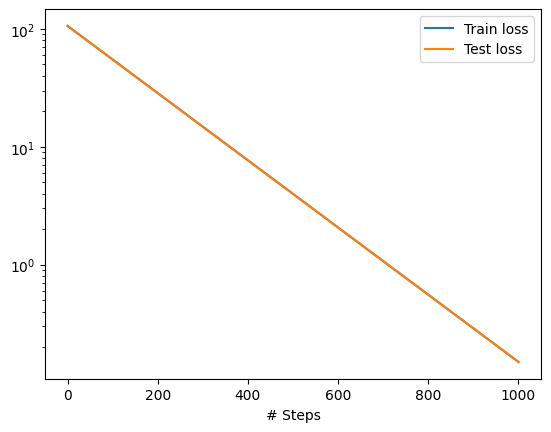

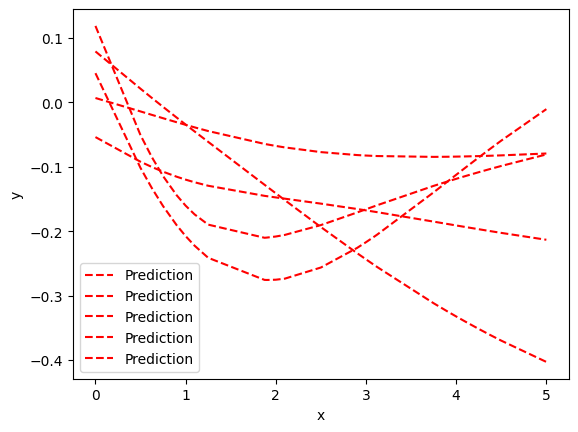

Elapsed time: 148.60938620567322 seconds


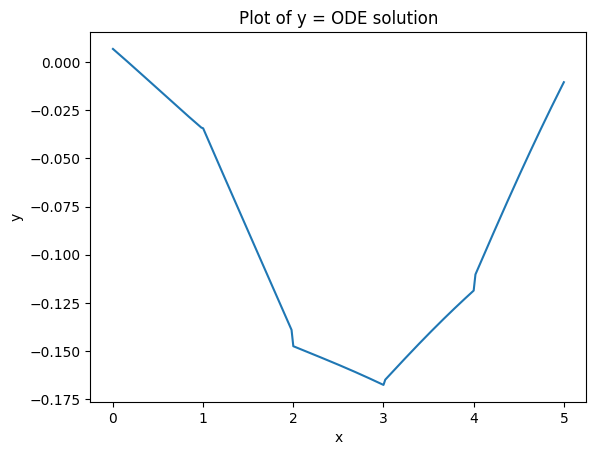

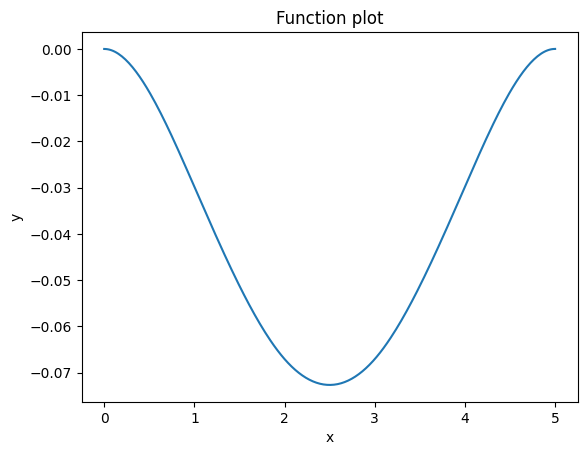

Differences: [0.006856961641460657, 0.005075026145211872, 0.010748128565338577, 0.048253045650054775, 0.08080106625278854, 0.09146107774692337, 0.09182385912001573, 0.08865388845354116, 0.0546831845897362, 0.010430579133033469]
Sum of differences: 1.4019766235829534
Iterations: 1000, Elapsed time: 148.61 seconds
Sum of differences: 1.40e+00
Test loss: 1.50e-01

Training model...

Step      Train loss                                                                                                                                                                                                            Test loss                                                                                                                                                                                                             Test metric
1000      [7.73e-02, 4.70e-05, 1.64e-03, 1.09e-04, 8.53e-03, 1.99e-07, 4.67e-03, 1.83e-04, 1.11e-03, 4.10e-05, 7.52e-03, 1.48e-04, 4.33e-03, 3.00e-06, 5.29e-03, 1.71e-

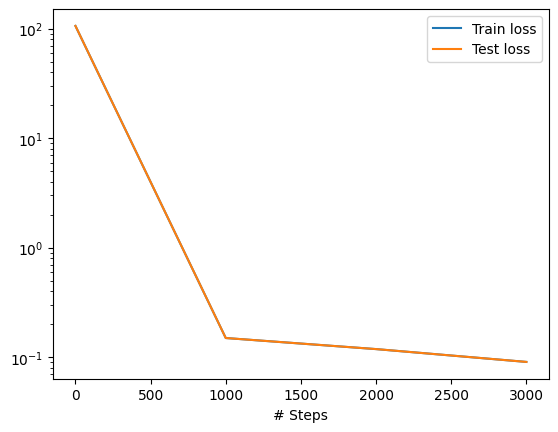

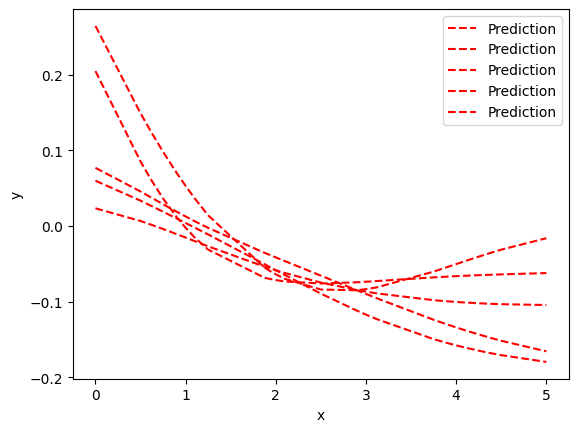

Elapsed time: 183.09486079216003 seconds


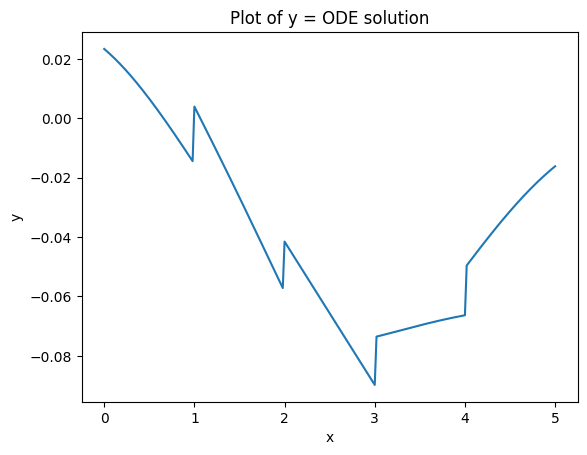

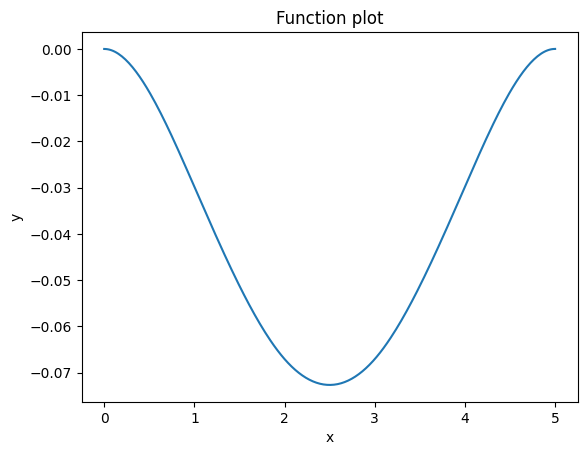

Differences: [0.023346617817878723, 0.015572641203172985, 0.032207322148295914, 0.0201984297019941, 0.018882322814861296, 0.007391706523473665, 0.013655198717717754, 0.03199876462369955, 0.022021739150874353, 0.016182159132957175]
Sum of differences: 0.5778344608253957
Iterations: 2000, Elapsed time: 183.09 seconds
Sum of differences: 5.78e-01
Test loss: 9.06e-02

Training model...

Step      Train loss                                                                                                                                                                                                            Test loss                                                                                                                                                                                                             Test metric
3000      [6.99e-02, 5.45e-04, 6.60e-04, 2.62e-04, 6.17e-04, 3.71e-04, 1.91e-04, 1.63e-05, 9.69e-04, 2.86e-04, 2.27e-04, 2.79e-05, 2.03e-03, 2.60e-04, 3.05e-03, 6.7

KeyboardInterrupt: ignored

In [3]:
L = 5
pl1 = 1
pl2 = 4
pl3 = 2
pl4 = 3

p = 5*10**5
E = 24855578000
I = 0.00045


#convert Newton to MegaNewton
p = p*10**-6
E = E*10**-6

scale = 1

EI = E*I

# Define the domain
geom = dde.geometry.Interval(0, L)

def dy(x, y):
    return dde.grad.jacobian(y, x)

def ddy(x, y):
    return dde.grad.hessian(y, x)

def dddy(x, y):
    return tf.gradients(ddy(x, y), x)[0]

def pde(x, y):
    x_left = tf.greater(x, pl1)
    x_right = tf.less(x, pl2)

    left = tf.less(x, pl1)
    right = tf.greater(x , pl2)
    mid = x_left & x_right

    y1 = tf.where(left, y[:,0:1], y[:,1:3])
    y2 = tf.where(mid, y[:,1:2], tf.concat([y[:, 0:1],y[:, 2:3]], axis=1))
    y3 = tf.where(right, y[:,2:3],y[:,0:2])

    dy1_x = dde.grad.jacobian(y1, x)
    dy1_xx = dde.grad.jacobian(dy1_x, x)
    dy1_xxx = dde.grad.jacobian(dy1_xx, x)
    dy1_xxxx = dde.grad.jacobian(dy1_xxx, x)
    dy2_x = dde.grad.jacobian(y2, x)
    dy2_xx = dde.grad.jacobian(dy2_x, x)
    dy2_xxx = dde.grad.jacobian(dy2_xx, x)
    dy2_xxxx = dde.grad.jacobian(dy2_xxx, x)
    dy3_x = dde.grad.jacobian(y3, x)
    dy3_xx = dde.grad.jacobian(dy3_x, x)
    dy3_xxx = dde.grad.jacobian(dy3_xx, x)
    dy3_xxxx = dde.grad.jacobian(dy3_xxx, x)

    return tf.where(left, EI*dy1_xxxx, tf.where(mid, EI*dy2_xxxx, EI*dy3_xxxx))

# Boundary conditions

def boundary_l(x, on_boundary):
    return on_boundary and np.isclose(x[0], 0)

def boundary_r(x, on_boundary):
    return on_boundary and np.isclose(x[0], L)

def on_interf_1(x, _):
    return np.isclose(x[0], pl1)
def on_interf_2(x, _):
    return np.isclose(x[0], pl2)

def data_1(x, _):
    return np.isclose(x[0], L/2)
def data_2(x, _):
    return np.isclose(x[0], L/8)
def data_3(x, _):
    return np.isclose(x[0], 7*L/8)
def data_4(x, _):
    return np.isclose(x[0], L/4)
def data_5(x, _):
    return np.isclose(x[0], 3*L/4)
def data_6(x, _):
    return np.isclose(x[0], 3*L/8)
def data_7(x, _):
    return np.isclose(x[0], 5*L/8)


xxxx=np.array(([pl1-0.1],[pl1],[pl1+0.1],[pl2-0.1],[pl2],[pl2+0.1],[pl3-0.1],[pl3],[pl3+0.1],[pl4-0.1],[pl4],[pl4+0.1],[L/2],[L/4],[3*L/4],[L/8],[7*L/8],[3*L/8],[5*L/8],[0],[L],[2*L/20],[18*L/20],[3*L/20],[17*L/20],[2*L/10],[8*L/10],[6*L/10],[4*L/10]))


def continuity_deflection(x, y,_):
    y1 = y[:,0:1]
    y2 = y[:,1:2]
    y3 = y[:,2:3]
    return [y1,y2,y3]

def continuity_slope(x, y,_):
    y1 = y[:,0:1]
    y2 = y[:,1:2]
    y3 = y[:,2:3]
    dy1_x = dde.grad.jacobian(y1, x)
    dy2_x = dde.grad.jacobian(y2, x)
    dy3_x = dde.grad.jacobian(y3, x)
    return [dy1_x,dy2_x,dy3_x]

def continuity_moment(x, y, X):
    y1 = y[:,0:1]
    y2 = y[:,1:2]
    y3 = y[:,2:3]
    dy1_x = dde.grad.jacobian(y1, x)
    dy1_xx = dde.grad.jacobian(dy1_x, x)
    dy2_x = dde.grad.jacobian(y2, x)
    dy2_xx = dde.grad.jacobian(dy2_x, x)
    dy3_x = dde.grad.jacobian(y3, x)
    dy3_xx = dde.grad.jacobian(dy3_x, x)
    return [dy1_xx,dy2_xx,dy3_xx]

def continuity_shear(x, y, X):
    y1 = y[:,0:1]
    y2 = y[:,1:2]
    y3 = y[:,2:3]
    dy1_x = dde.grad.jacobian(y1, x)
    dy1_xx = dde.grad.jacobian(dy1_x, x)
    dy1_xxx = dde.grad.jacobian(dy1_xx, x)
    dy2_x = dde.grad.jacobian(y2, x)
    dy2_xx = dde.grad.jacobian(dy2_x, x)
    dy2_xxx = dde.grad.jacobian(dy2_xx, x)
    dy3_x = dde.grad.jacobian(y3, x)
    dy3_xx = dde.grad.jacobian(dy3_x, x)
    dy3_xxx = dde.grad.jacobian(dy3_xx, x)
    return [dy1_xxx,dy2_xxx,dy3_xxx]

#Two end supports

bc1 = dde.icbc.OperatorBC(geom, lambda x, y, _: continuity_deflection(x, y, _)[0], boundary_l)
bc2 = dde.icbc.OperatorBC(geom, lambda x, y, _: continuity_slope(x, y, _)[0], boundary_l)
bc3 = dde.icbc.OperatorBC(geom, lambda x, y, _: continuity_deflection(x, y, _)[2] , boundary_r)
bc4 = dde.icbc.OperatorBC(geom, lambda x, y, _: continuity_slope(x, y, _)[2] , boundary_r)

bc5 = dde.icbc.OperatorBC(geom, lambda x, y, _: continuity_deflection(x, y, _)[0] - continuity_deflection(x, y, _)[1] , on_interf_1)
bc6 = dde.icbc.OperatorBC(geom, lambda x, y, _: continuity_slope(x, y, _)[0] - continuity_slope(x, y, _)[1] , on_interf_1)
bc7 = dde.icbc.OperatorBC(geom, lambda x, y, _: EI*continuity_moment(x, y, _)[0] - EI*continuity_moment(x, y, _)[1] , on_interf_1)
bc8 = dde.icbc.OperatorBC(geom, lambda x, y, _: EI*continuity_shear(x, y, _)[0] -  EI*continuity_shear(x, y, _)[1] - p , on_interf_1)

bc9 = dde.icbc.OperatorBC(geom, lambda x, y, _: continuity_deflection(x, y, _)[1] - continuity_deflection(x, y, _)[2] , on_interf_2)
bc10 = dde.icbc.OperatorBC(geom, lambda x, y, _: continuity_slope(x, y, _)[1] - continuity_slope(x, y, _)[2] , on_interf_2)
bc11 = dde.icbc.OperatorBC(geom, lambda x, y, _: EI*continuity_moment(x, y, _)[1] - EI*continuity_moment(x, y, _)[2] , on_interf_2)
bc12 = dde.icbc.OperatorBC(geom, lambda x, y, _: EI*continuity_shear(x, y, _)[1] -  EI*continuity_shear(x, y, _)[2] - p , on_interf_2)

ic1 = dde.icbc.OperatorBC(geom, lambda x, y, _: continuity_deflection(x, y, _)[1] + 0.0204887 , data_1)
ic2 = dde.icbc.OperatorBC(geom, lambda x, y, _: continuity_deflection(x, y, _)[0] + 0.005262 , data_2)
ic3 = dde.icbc.OperatorBC(geom, lambda x, y, _: continuity_deflection(x, y, _)[2] + 0.005262 , data_3)
ic4 = dde.icbc.OperatorBC(geom, lambda x, y, _: continuity_deflection(x, y, _)[1] + 0.013225 , data_4)
ic5 = dde.icbc.OperatorBC(geom, lambda x, y, _: continuity_deflection(x, y, _)[1] + 0.013225 , data_5)
ic6 = dde.icbc.OperatorBC(geom, lambda x, y, _: continuity_deflection(x, y, _)[1] + 0.018533 , data_6)
ic7 = dde.icbc.OperatorBC(geom, lambda x, y, _: continuity_deflection(x, y, _)[1] + 0.018533 , data_7)


def func(x):
    pl1 = 1
    pl2 = 4

    if x<=pl1:
        return ((-0.0178811*x**2) + (0.00745045*x**3))
    elif x > pl1 and x < pl2:
        return (0.00745045 - (0.0223513*x) + (0.00447027*x**2) + (6.92058*10**-18*x**3))
    else:
        return (0.484279 - (0.379973*x) + (0.0938756*x**2) - (0.00745045*x**3))


boundary_condition_list = [bc12,ic1,ic2,ic3,ic4,ic5,ic6,ic7]

# Create empty lists to store results
results = []
losses = []

layer_size = [1] + [20] * 3 + [5]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

boundary_conditions = [bc1, bc2, bc3, bc4, bc5, bc6, bc7, bc8, bc9, bc10, bc11]

for bc in boundary_condition_list:
    boundary_conditions.append(bc)

    start_time = time.time()
    data = dde.data.PDE(
        geom,
        pde,
        boundary_conditions,
        num_domain=0,
        num_boundary=0,
        #solution=func,
        anchors=xxxx,
    )

    model = dde.Model(data, net)
    model.compile("adam", lr=0.0005)

    # Initialize variables
    iterations_list = [1000, 2000, 2000, 5000, 10000, 20000]

    for iterations in iterations_list:
        losshistory, train_state = model.train(iterations=iterations)

        dde.saveplot(losshistory, train_state, issave=True, isplot=True)
        test_loss = train_state.best_loss_test

        end_time = time.time()
        elapsed_time = end_time - start_time
        print("Elapsed time:", elapsed_time, "seconds")

        N = 256
        x0 = np.linspace(0,L,N)

        X = x0.reshape(-1,1)

        Ys = model.predict(X)

        Y10 = Ys[:,0]
        Y20 = Ys[:,1]
        Y30 = Ys[:,2]

        N1 = round(N * (pl1 / L))
        N2 = round(N * (pl2 / L))

        Y1 = Y10[:N1]
        Y2 = Y20[N1:N2]
        Y3 = Y30[N2:]

        Y = np.hstack([Y1,Y2,Y3])
        plt.plot(x0, Y)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Plot of y = ODE solution')
        plt.show()

        j = [func(x0i) for x0i in x0]

        indices = np.linspace(0, len(x0)-1, 10, dtype=int)  # Get the indices for 10 equally spaced numbers
        #selected_numbers = k[indices]  # Select the numbers at the corresponding indices

        plt.plot(x0, j)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Function plot')
        plt.show()

        selected_elements_pinn = [Y[i] for i in indices]
        selected_elements_ana = [j[i] for i in indices]

        differences = [abs(p - a) for p, a in zip(selected_elements_pinn, selected_elements_ana)]  # Calculate differences
        sum_of_differences = sum(differences)/abs(sum(selected_elements_ana))  # Sum all differences

        print("Differences:", differences)
        print("Sum of differences:", sum_of_differences)


        # Store the results in a dictionary
        result = {
            'iterations': iterations,
            'elapsed_time': elapsed_time,
            'sum_of_differences': sum_of_differences,
            'test_loss': test_loss
        }
        results.append(result)
        losses.append(test_loss)

        print(f"Iterations: {iterations}, Elapsed time: {elapsed_time:.2f} seconds")
        print(f"Sum of differences: {sum_of_differences:.2e}")
        print(f"Test loss: {test_loss:.2e}")
        print("")


# Convert results and losses to pandas DataFrames
results_df = pd.DataFrame(results)

# Save the results to an Excel file

with pd.ExcelWriter('/content/results.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Results_fourload', index=False)


In [ ]:
from google.colab import files


# Download the file
files.download('/content/results.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>